In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "New Bank_loan_data.xlsx"
df_original = pd.read_excel(file_path)
df_original.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [3]:
df_original.shape

(5000, 16)

In [4]:
df_original.dtypes

ID                      int64
Age                     int64
Gender                 object
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Home Ownership         object
Personal Loan          object
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [6]:
df_original.describe(include = "all")

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,3404,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3811,5000.0,5000.000000,5000.00000,4960.000000,5000.000000
unique,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Mortage,0.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1705,4520.0,NaN,NaN,NaN,NaN
mean,2500.500000,46.008200,NaN,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,NaN,NaN,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,NaN,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,NaN,NaN,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,NaN,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,NaN,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,NaN,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,NaN,NaN,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,NaN,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,NaN,NaN,0.000000,0.00000,1.000000,1.000000


In [7]:
# The code below shows the total number of missing values in each column
df_original.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [8]:
# different unique values in Gender column
df_preprocessed = df_original.copy()
df_preprocessed['Gender'].unique()

array(['M', 'F', 'O', nan, '#', '-'], dtype=object)

In [9]:
# Since, "#" and "-" are random values, we are replacing "#" and "-" data in Gender column with NaN
df_preprocessed['Gender'] = df_preprocessed['Gender'].replace(['#', '-'], np.nan)

In [10]:
# handling categorical value "Missing" in gender column witn pandas.get_dummies method
# it converts categorical values into dummy variables
gender_dummies = pd.get_dummies(df_preprocessed['Gender'])
df_preprocessed = pd.concat([df_preprocessed, gender_dummies], axis = 1)
df_preprocessed

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0,0,1,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0,0,1,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0,0,1,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0,0,1,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,NaN,3,40.0,92697,1,1.9,3,0,NaN,0,0,0,1.0,0,0,0,0
4996,4997,30,NaN,4,15.0,92037,4,0.4,1,85,NaN,0,0,0,1.0,0,0,0,0
4997,4998,63,NaN,39,24.0,93023,2,0.3,3,0,NaN,0,0,0,0.0,0,0,0,0
4998,4999,65,NaN,40,49.0,90034,3,0.5,2,0,NaN,0,0,0,1.0,0,0,0,0


In [11]:
df_preprocessed.drop('Gender', axis=1, inplace=True)

In [12]:
df_preprocessed['Home Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage', nan], dtype=object)

In [13]:
home_ownership_dummies = pd.get_dummies(df_preprocessed['Home Ownership'])
df_preprocessed = pd.concat([df_preprocessed, home_ownership_dummies], axis=1)

In [14]:
df_preprocessed.drop('Home Ownership', axis=1, inplace=True)

In [15]:
df_preprocessed

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O,Home Mortage,Home Owner,Rent
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0,0,1,0,0,1,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0,0,1,0,0,0,1
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0,0,1,0,0,0,1
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0,0,1,0,0,0,1
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1.0,0,0,0,0,0,0,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1.0,0,0,0,0,0,0,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0.0,0,0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1.0,0,0,0,0,0,0,0


In [16]:
df_preprocessed['Personal Loan'].unique()

array([0, 1, ' '], dtype=object)

In [17]:
df_preprocessed['Personal Loan'].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

In [18]:
# we can drop the row where "Personal Loan" == " " since there is only 1 such row
df_preprocessed = df_preprocessed[df_preprocessed['Personal Loan'] != ' ']
df_preprocessed.shape

(4999, 20)

<Axes: xlabel='Income', ylabel='Count'>

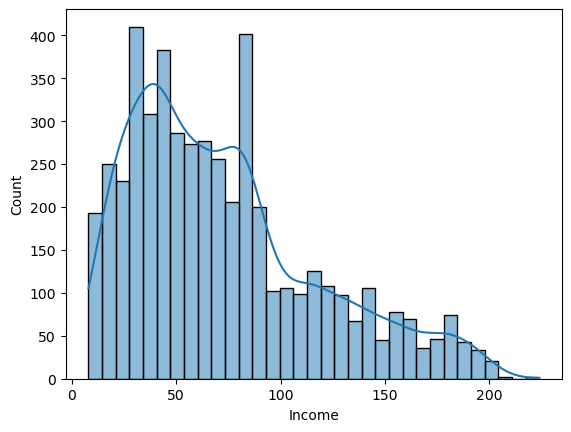

In [19]:
import seaborn as sns
sns.histplot(df_preprocessed['Income'], kde=True)

<Axes: >

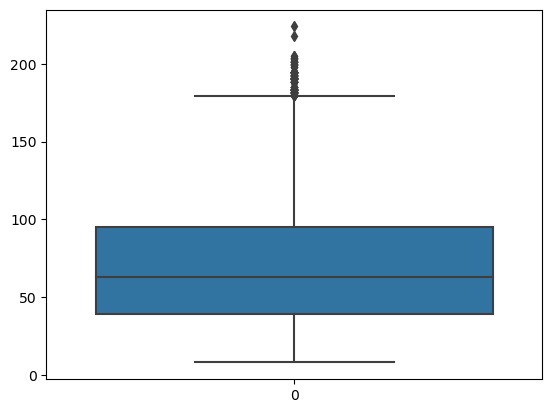

In [20]:
sns.boxplot(df_preprocessed['Income'])

In [21]:
# calculate the median of 'Income' column
median_income = df_preprocessed['Income'].median()

# Fill missing values in the 'Income column with the median
df_preprocessed['Income'].fillna(median_income, inplace=True)
df_preprocessed

C:\Users\LEVEL51PC\AppData\Local\Temp\ipykernel_13764\1956685948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['Income'].fillna(median_income, inplace=True)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O,Home Mortage,Home Owner,Rent
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0,0,1,0,0,1,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0,0,1,0,0,0,1
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0,0,1,0,0,0,1
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0,0,1,0,0,0,1
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1.0,0,0,0,0,0,0,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1.0,0,0,0,0,0,0,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0.0,0,0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1.0,0,0,0,0,0,0,0


In [22]:
df_preprocessed['Online'].value_counts(dropna = False)

1.0    2960
0.0    1999
NaN      40
Name: Online, dtype: int64

In [23]:
# Since there are only few null values we can replace the null values using mode imputation
df_preprocessed['Online'].mode()

0    1.0
Name: Online, dtype: float64

In [24]:
# Since there are only few null values we can replace the null values using mode imputation

# Calculate the mode of the 'Online' column
mode_online = df_preprocessed['Online'].mode()[0]

# Fill missing categorical values in the 'Online' column with the mode
df_preprocessed['Online'].fillna(mode_online, inplace=True)
df_preprocessed

C:\Users\LEVEL51PC\AppData\Local\Temp\ipykernel_13764\1113759204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['Online'].fillna(mode_online, inplace=True)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O,Home Mortage,Home Owner,Rent
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0,0,1,0,0,1,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0,0,1,0,0,0,1
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0,0,1,0,0,0,1
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0,0,1,0,0,0,1
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1.0,0,0,0,0,0,0,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1.0,0,0,0,0,0,0,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0.0,0,0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1.0,0,0,0,0,0,0,0


<Axes: >

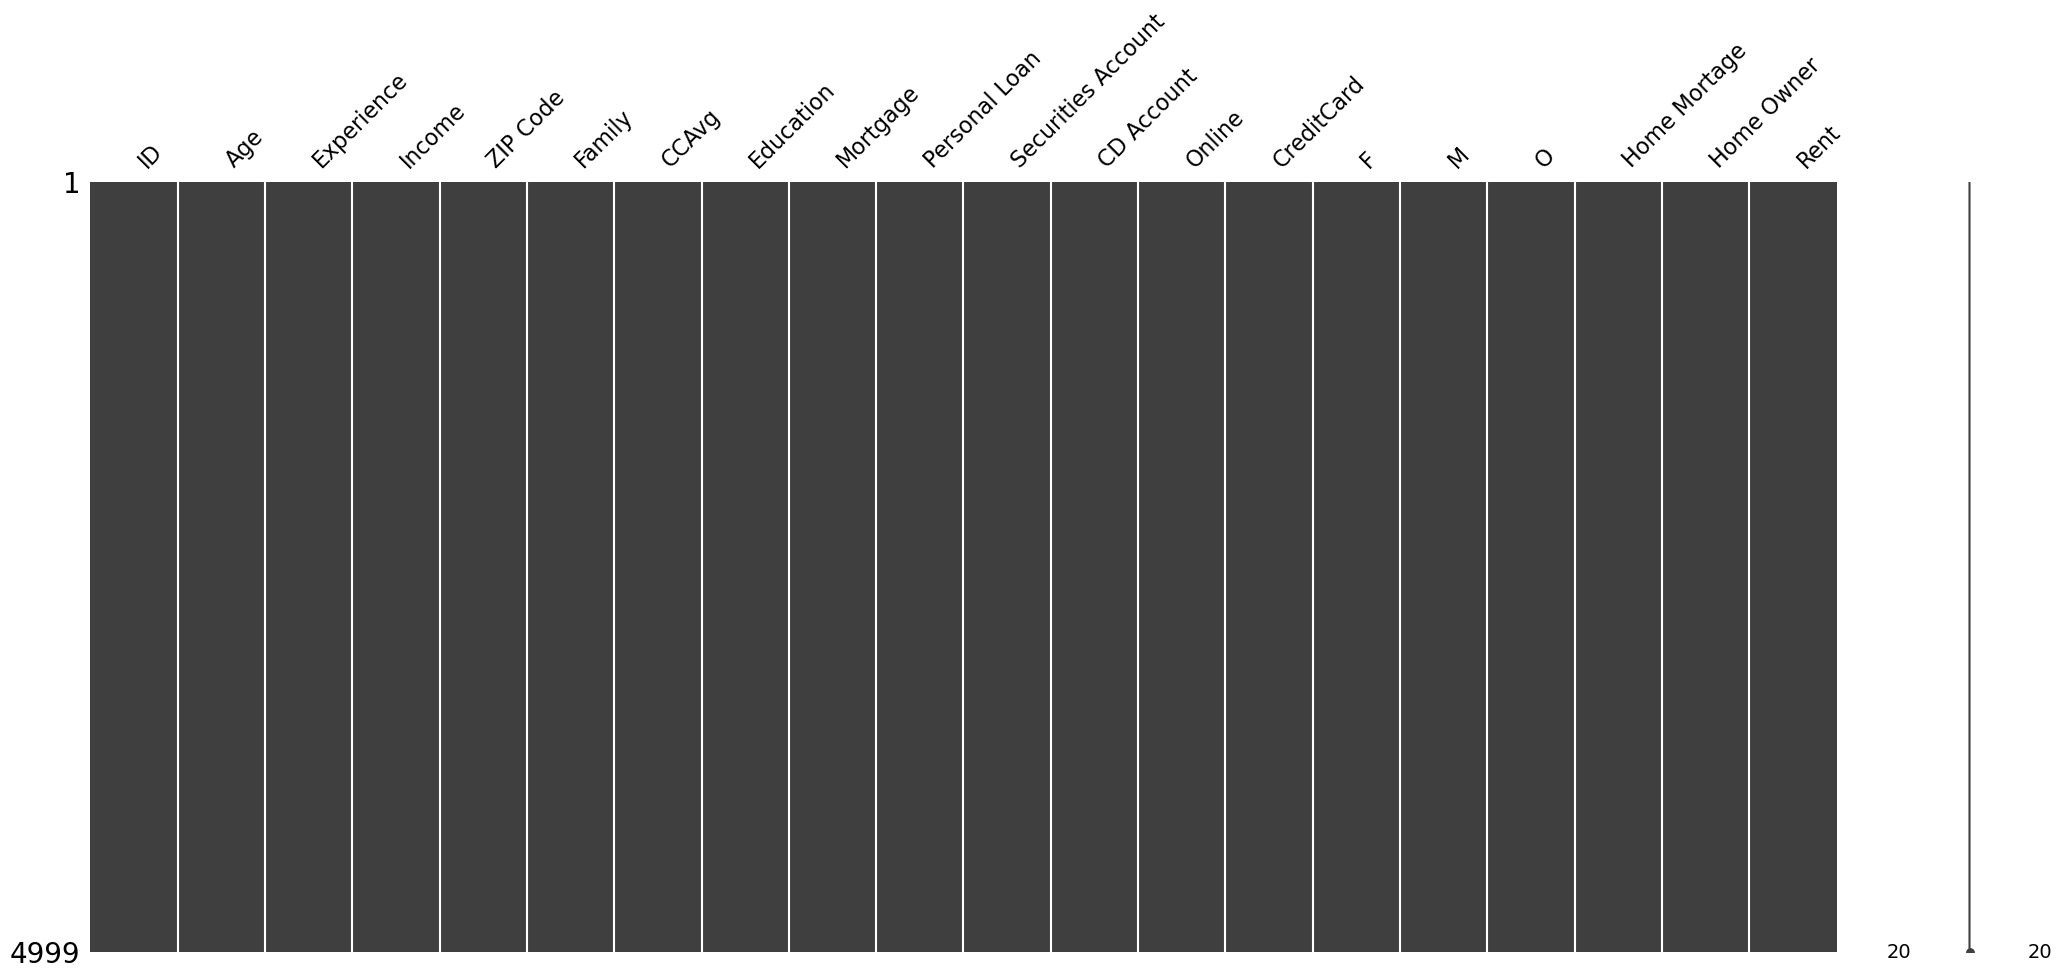

In [25]:
# missingno helps us to see if there are any missing values in dataframe, the white horizontal lines
# indicate missing values, we can see none. Therefore, we can conclude that there are no missing values in our dataframe
import missingno as msno

msno.matrix(df_preprocessed)

<Axes: >

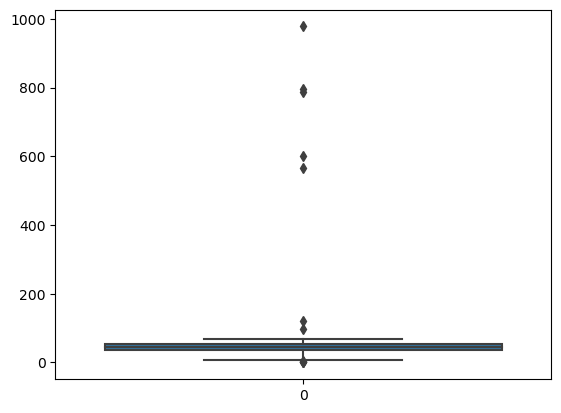

In [26]:
sns.boxplot(df_preprocessed['Age'])

In [27]:
# Since there are outlies in the "Age" column we are going to remove those outliers by using
# IQR Proximity Technique
percentile25 = df_preprocessed['Age'].quantile(0.25)
percentile75 = df_preprocessed['Age'].quantile(0.75)

In [28]:
# Calculating Inter Quartile Range (IQR)
iqr = percentile75 - percentile25
iqr

20.0

In [29]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 -1.5 *iqr
print("Upper Limit", upper_limit)
print("Lower Limit", lower_limit)

Upper Limit 85.0
Lower Limit 5.0


In [30]:
df_preprocessed[df_preprocessed['Age'] > upper_limit] 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O,Home Mortage,Home Owner,Rent
47,48,97,12,194.0,91380,4,0.2,3,211,1,1,1,1.0,1,0,1,0,0,0,1
53,54,567,26,190.0,90245,3,2.1,3,240,1,0,0,1.0,0,0,1,0,0,0,1
131,132,122,34,149.0,93720,4,7.2,2,0,1,0,1,1.0,1,0,1,0,0,0,1
765,766,978,21,109.0,95822,4,1.8,1,0,1,0,0,0.0,0,0,1,0,0,0,1
2005,2006,786,23,170.0,90254,2,6.5,2,0,1,0,1,1.0,1,1,0,0,1,0,0
2101,2102,600,5,203.0,95032,1,10.0,3,0,1,0,0,0.0,0,0,1,0,1,0,0
2541,2542,797,8,171.0,90212,2,2.2,2,569,1,0,0,1.0,0,0,1,0,0,1,0


In [31]:
df_preprocessed[df_preprocessed['Age'] < lower_limit] 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O,Home Mortage,Home Owner,Rent
78,79,0,30,63.0,93305,2,2.6,3,0,1,0,0,0.0,0,0,1,0,0,0,1
1583,1584,0,36,184.0,92028,4,2.3,2,342,1,0,1,1.0,1,1,0,0,0,0,1
1666,1667,2,25,190.0,95138,2,4.2,2,0,1,0,0,1.0,0,1,0,0,0,0,1
1798,1799,4,20,185.0,94086,3,2.7,1,0,1,0,0,1.0,0,0,1,0,1,0,0


In [32]:
df_no_outliers = df_preprocessed.copy()

# Capping outliers in Age column where upper range outliers are capped with upper_limit value and
# lower range outliers are capped with lower_limit value
df_no_outliers['Age'] = np.where(df_no_outliers['Age'] > upper_limit, upper_limit, np.where(df_no_outliers['Age'] < lower_limit, lower_limit, df_no_outliers['Age']))

In [33]:
# Final dataset for prediction, dropping unneccesary columns that are irrelevant for the prediction
df_final = df_no_outliers.drop(['ID', 'ZIP Code'], axis=1)
df_final

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,F,M,O,Home Mortage,Home Owner,Rent
0,25.0,1,49.0,4,1.6,1,0,0,1,0,0.0,0,0,1,0,0,1,0
1,45.0,19,34.0,3,1.5,1,0,0,1,0,0.0,0,0,1,0,0,0,1
2,39.0,15,11.0,1,1.0,1,0,0,0,0,0.0,0,0,1,0,0,0,1
3,35.0,9,100.0,1,2.7,2,0,0,0,0,0.0,0,0,1,0,0,0,1
4,35.0,8,45.0,4,1.0,2,0,0,0,0,0.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3,40.0,1,1.9,3,0,0,0,0,1.0,0,0,0,0,0,0,0
4996,30.0,4,15.0,4,0.4,1,85,0,0,0,1.0,0,0,0,0,0,0,0
4997,63.0,39,24.0,2,0.3,3,0,0,0,0,0.0,0,0,0,0,0,0,0
4998,65.0,40,49.0,3,0.5,2,0,0,0,0,1.0,0,0,0,0,0,0,0


<Axes: xlabel='Age', ylabel='Count'>

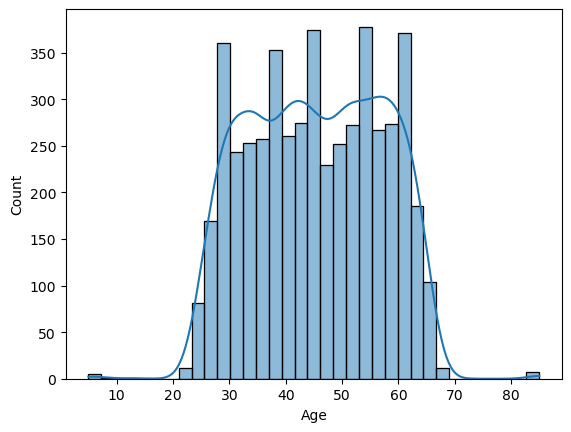

In [34]:
# After the outliers detection and dealing with them, we can see that the plot for Age column is normally distributed
sns.histplot(df_final['Age'], kde=True)

<Axes: >

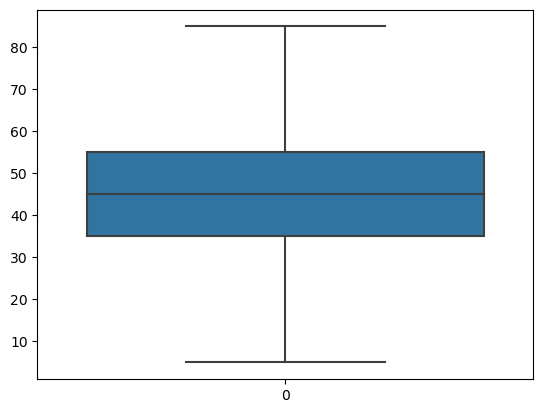

In [35]:
# After the outliers detection and dealing with them, we can see that the box-plot for Age column has no outliers
sns.boxplot(df_final['Age'])

In [36]:
df_final['Personal Loan'].value_counts()

0    4520
1     479
Name: Personal Loan, dtype: int64

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   float64
 1   Experience          4999 non-null   int64  
 2   Income              4999 non-null   float64
 3   Family              4999 non-null   int64  
 4   CCAvg               4999 non-null   float64
 5   Education           4999 non-null   int64  
 6   Mortgage            4999 non-null   int64  
 7   Personal Loan       4999 non-null   object 
 8   Securities Account  4999 non-null   int64  
 9   CD Account          4999 non-null   int64  
 10  Online              4999 non-null   float64
 11  CreditCard          4999 non-null   int64  
 12  F                   4999 non-null   uint8  
 13  M                   4999 non-null   uint8  
 14  O                   4999 non-null   uint8  
 15  Home Mortage        4999 non-null   uint8  
 16  Home O

In [38]:
# Convert 'Personal Loan' column to numeric values so that the model can understand
df_final['Personal Loan'] = df_final['Personal Loan'].astype(int)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
# Split the data into features (X) and target (Y)
X = df_final.drop('Personal Loan', axis=1)
y = df_final['Personal Loan']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Since the target column "Personal Loan" has an imbalanced data, we need to use class weights to balance it
class_0_count = len(y_train) - y_train.sum()
class_1_count = y_train.sum()
print("class_0_count:", class_0_count)
print("class_1_count:", class_1_count)

# Assigning class_weight
class_weights = {0: class_1_count / class_0_count, 1: 1}
print(class_weights)

# Create a Logistic Regression Model with class weights
model = LogisticRegression(class_weight=class_weights)

# Fit the model on the training data
model.fit(X_train, y_train)

#Predict on the test data
y_pred = model.predict(X_test)

#Calculate and print confusion matreix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print(classification_report(y_test, y_pred))

#Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

class_0_count: 3618
class_1_count: 381
{0: 0.10530679933665009, 1: 1}
Confusion Matrix:
[[799 103]
 [ 17  81]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       902
           1       0.44      0.83      0.57        98

    accuracy                           0.88      1000
   macro avg       0.71      0.86      0.75      1000
weighted avg       0.93      0.88      0.90      1000

Accuracy:  0.88


C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


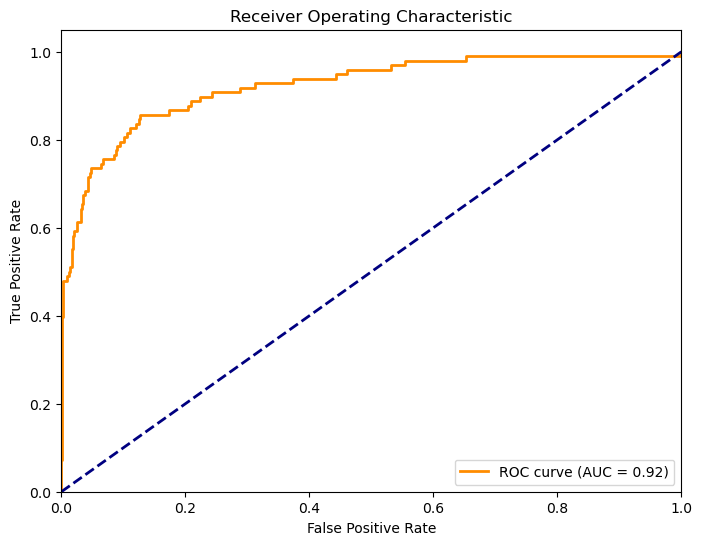

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 

# Get predicted probabilities for positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Import the pickle module for serialization
import pickle

In [43]:
# Save the trained model to a file
# 'wb' stands for write binary mode, ensuring compatibility across different platforms
with open('model_pickle', 'wb') as file:
    # Use the pickle.dump() function to save the model into the file
    pickle.dump(model, file)

In [44]:
# Load the model back
# 'rb' stands for read binary mode, matching the mode used during saving
with open('model_pickle', 'rb') as file:
    # Use the pickle.load() function to load the model from the file
    loaded_model = pickle.load(file)

In [45]:
# Use the loaded model for prediction
# Here, X_new represents the new data you want to predict on
# predictions = loaded_model.predict(X_new)